<center><h1>911<br>Data Analysis(2015-2020)</h1></center>

## **INTRODUCTION**

**Context**<br>
The police/cops are always there to help out people that require their assistance. They are the reason that people are able to live peacefully and happily without any fear. This data set contains the data of such 911 calls that were made in the past.

**Content**<br>
The data set contains the data about latitude and longitude of the places from where call was made. I also contains a short description of the call, the station that took the call, the reason behind the call and other relevant data.

This file contains calls to 911 (emergency calls) in Montgomery County Pennsylvania.
**Emergency (911) Calls:** Fire, Traffic, EMS for Montgomery County, PA

# **ASK QUESTIONS**

**Business problem**
1. What are the most common reasons for emergency calls, and how can public awareness and prevention programs be targeted effectively?
2. How do characteristics of emergency calls vary across different townships and neighborhoods?

# **PREPARE THE DATA**

**Key Metrics**

1. Total Number of Calls
2. Number of Calls by Type(EMS, Fire, Traffic).
3. Number of Calls by Township
4. Number of Calls by Zipcode
5. Number of Calls by Address
6. Calls Over Time
7. Peak Hours for Calls
8. Peak Days for Calls
9. Peak Months for Calls
10. Peak Weekdays for Calls
11. Geographical Distribution
12. Most Common Emergency Descriptions

**Data Credibility**

The data is 100% credible, complete and compatible as calculated by Kaggle. However, the dataset doesn't contain the data from months 9 to 11; data from September to November.


**Structure of the dataset**

**The data contains the following fields:**

**lat** : String variable, Latitude

**lng**: String variable, Longitude

**desc**: String variable, Description of the Emergency Call

**zip**: String variable, Zipcode

**title**: String variable, Title

**timeStamp**: String variable, YYYY-MM-DD HH:MM:SS

**twp**: String variable, Township

**addr**: String variable, Address

**e**: String variable, Dummy variable (always 1)

# **PROCESS THE DATA**

**Import necessary libraries**

In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

**Read csv file and putting in a dataframe called df**

In [251]:
df = pd.read_csv("dataset/911.csv")

**Checking the info about the dataset**

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


**Glimpse of the dataset**

In [253]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## **Data Cleaning**

**Checking for Null or missing values**

In [254]:
df.isna().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

We can see that there are 80199 values missing in the zip column and 293 values in twp column.
Lets find the percentage of missing column.

In [255]:
zip_percent = df['zip'].isnull().mean() * 100
twp_percent = df['twp'].isnull().mean() * 100
print(f"'zip': {round(zip_percent,2)}, twp: {round(twp_percent,2)}")

'zip': 12.09, twp: 0.04


We can clearly see that only 0.04% of values are missing in twp column, so it is safe to drop the null values in the twp column

In [256]:
df.dropna(subset=['twp'],inplace=True)

Validating the result

In [257]:
df.isna().sum()

lat              0
lng              0
desc             0
zip          80030
title            0
timeStamp        0
twp              0
addr             0
e                0
dtype: int64

**Handling the null values in zip**

In [258]:
print(f"Number of unique zip codes in the data : {df['zip'].nunique()}")
print(f"Number of unique townships in the data : {df['twp'].nunique()}")

zip_consistency = df.groupby('twp')['zip'].apply(lambda x: x.nunique() == 1)
inconsistent_zips = zip_consistency[~zip_consistency].index.tolist()
print(f"Number of inconsistent towns with zip codes within the data :  {len(inconsistent_zips)}")


Number of unique zip codes in the data : 200
Number of unique townships in the data : 68
Number of inconsistent towns with zip codes within the data :  68


At a glance of the data it might be the case that the towns have same zip codes but after running the above code we can see that the zip code and towns are inconsistent.

For handling the null values in the zip code column we are going to leave it as it is.
The best option that comes to mind is mode but as this is the case of zip codes, a wrong zip code might be assigned to a different town.
Filling it without expertise might lead to biases causing statistical inference

**Checking for duplicate data**

In [259]:
df.duplicated().sum()

240

We can see that the dataset has 240 duplicate values. So we need to remove the duplicates.

In [260]:
df.drop_duplicates(inplace=True)

**Validating the result**

In [261]:
df.duplicated().sum()

0

Now we got rid of the duplicate data. Lets get some summary of our cleaned data.

**Some summary of the dataset**

In [262]:
print(f"Number of unique zip codes in the data : {df['zip'].nunique()}")
print(f"Number of unique townships in the data : {df['twp'].nunique()}")
print(f"Number of unique addresses in the data : {df['addr'].nunique()}")

Number of unique zip codes in the data : 200
Number of unique townships in the data : 68
Number of unique addresses in the data : 41249


After cleaning the data the summary of the dataset states that there are:<br>
Data has 9 columns.<br>
200 zip codes & 68 towns<br>
41249 different addresses.

## **Transform Data**

Now we will transform the data and create a new dataframe according to our needs.

1. lat and lng<br>

We need the latitude and longitude to check the geographical distribution. So we will keep both the columns in our new dataframe.

In [263]:
new_df = df[['lat','lng']]

2. desc

In [264]:
print(df['desc'][0])
print(df['timeStamp'][0])
print(df['addr'][0])
print(df['twp'][0])

REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;
2015-12-10 17:10:52
REINDEER CT & DEAD END
NEW HANOVER


We can see that most of the details in the desc column can be obtained from other columns (addr, twp, timeStamp).
So we will leave the desc column.

3. title

We can observe a common pattern "Department: Reason" specified. The departments are EMS, Fire, and Traffic. We will split the "title" into 2 columns namely deparment and reason.

In [265]:
new_df.loc[:,"dept"] = df['title'].apply(lambda x: x.split(':')[0])
new_df.loc[:,"reason"] = df['title'].apply(lambda x: x.split(':')[1])
new_df.head()

C:\Users\nilan\AppData\Local\Temp\ipykernel_28920\2871578032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,"dept"] = df['title'].apply(lambda x: x.split(':')[0])
C:\Users\nilan\AppData\Local\Temp\ipykernel_28920\2871578032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,"reason"] = df['title'].apply(lambda x: x.split(':')[1])


,lat,lng,dept,reason
0,40.297876,-75.581294,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,EMS,DIZZINESS


Lets check if the the splitted strings are formatted correctly

**dept**

In [266]:
new_df['dept'].value_counts()

#it is formatted correctly

dept
EMS        332379
Traffic    230111
Fire       100499
Name: count, dtype: int64

**reason**

In [267]:
new_df['reason'].value_counts().head(20)

reason
VEHICLE ACCIDENT -           148314
DISABLED VEHICLE -            47887
FIRE ALARM                    38428
VEHICLE ACCIDENT              36277
FALL VICTIM                   34662
RESPIRATORY EMERGENCY         34228
CARDIAC EMERGENCY             32318
ROAD OBSTRUCTION -            23225
SUBJECT IN PAIN               19641
HEAD INJURY                   18296
GENERAL WEAKNESS              11863
SEIZURES                      10812
SYNCOPAL EPISODE              10801
UNKNOWN MEDICAL EMERGENCY     10668
MEDICAL ALERT ALARM           10393
ALTERED MENTAL STATUS         10084
FIRE INVESTIGATION             9547
ABDOMINAL PAINS                8998
UNCONSCIOUS SUBJECT            8787
OVERDOSE                       8348
Name: count, dtype: int64

We can see some of the values have a '-' at the end lets fix that

In [268]:
def fix(reason):
    if reason[-1] == '-':
        reason = reason[:-2]
    return reason

new_df.loc[:,'reason'] = new_df['reason'].apply(fix)
new_df['reason'].value_counts().head(20)

reason
VEHICLE ACCIDENT             184591
DISABLED VEHICLE              47895
FIRE ALARM                    38428
FALL VICTIM                   34662
RESPIRATORY EMERGENCY         34228
CARDIAC EMERGENCY             32318
ROAD OBSTRUCTION              23227
SUBJECT IN PAIN               19641
HEAD INJURY                   18296
GENERAL WEAKNESS              11863
SEIZURES                      10812
SYNCOPAL EPISODE              10801
UNKNOWN MEDICAL EMERGENCY     10668
MEDICAL ALERT ALARM           10393
ALTERED MENTAL STATUS         10084
FIRE INVESTIGATION             9547
ABDOMINAL PAINS                8998
UNCONSCIOUS SUBJECT            8787
OVERDOSE                       8348
CVA/STROKE                     8275
Name: count, dtype: int64

In [269]:
reason_first_character = new_df['reason'].apply(lambda x : x[0])
reason_first_character

0          
1          
2          
3          
4          
         ..
663517     
663518     
663519     
663520     
663521     
Name: reason, Length: 662989, dtype: object

Also we can see that the first character of each reason has a blank space in it. Lets fix that.

In [270]:
new_df.loc[:,'reason'] = new_df['reason'].apply(lambda x : x[1:])

In [271]:
#Lets check the fix
reason_first_character = new_df['reason'].apply(lambda x : x[0])
reason_first_character

0         B
1         D
2         G
3         C
4         D
         ..
663517    V
663518    G
663519    V
663520    B
663521    V
Name: reason, Length: 662989, dtype: object

In [272]:
#Lets check how many unique reasons we have
print(f'The dataset has {new_df.reason.nunique()} unique reasons for 911 calls')

The dataset has 88 unique reasons for 911 calls


4. timeStamp

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662989 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        662989 non-null  float64
 1   lng        662989 non-null  float64
 2   desc       662989 non-null  object 
 3   zip        582993 non-null  float64
 4   title      662989 non-null  object 
 5   timeStamp  662989 non-null  object 
 6   twp        662989 non-null  object 
 7   addr       662989 non-null  object 
 8   e          662989 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 66.7+ MB


We can see that the timeStamp coloumn is string type. But that is not correct it should be of type dateTime.
Lets convert it to dateTime and split it to 3 new columns in the new dataframe (date, time, week)

In [274]:
df['datetime'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')

#Lets extract separate information
new_df.loc[:,'year'] = df['datetime'].dt.year
new_df.loc[:,'month'] = df['datetime'].dt.month
new_df.loc[:,'day'] = df['datetime'].dt.day
new_df.loc[:,'weekday'] = df['datetime'].dt.strftime('%A')
new_df['weekday'] = new_df['weekday'].apply(lambda x: x[:3])
new_df.loc[:,'hour'] = df['datetime'].dt.hour

new_df.head()

C:\Users\nilan\AppData\Local\Temp\ipykernel_28920\222373991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,'year'] = df['datetime'].dt.year
C:\Users\nilan\AppData\Local\Temp\ipykernel_28920\222373991.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,'month'] = df['datetime'].dt.month
C:\Users\nilan\AppData\Local\Temp\ipykernel_28920\222373991.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,lat,lng,dept,reason,year,month,day,weekday,hour
0,40.297876,-75.581294,EMS,BACK PAINS/INJURY,2015,12,10,Thu,17
1,40.258061,-75.264680,EMS,DIABETIC EMERGENCY,2015,12,10,Thu,17
2,40.121182,-75.351975,Fire,GAS-ODOR/LEAK,2015,12,10,Thu,14
3,40.116153,-75.343513,EMS,CARDIAC EMERGENCY,2015,12,10,Thu,16
4,40.251492,-75.603350,EMS,DIZZINESS,2015,12,10,Thu,16


5. zip, addr,twp are inserted as it is

In [275]:
new_df.loc[:,'zip'] = df['zip']
new_df.loc[:,'address'] = df['addr']
new_df.loc[:,'town'] = df['twp']

6. e

Column "e" has only value 1. So it can be ignored.

All the transformation is done. Now we have our new and transformed dataframe. Lets rearrange the dataframe.

Before that lets check the data type of our new dataframe

In [276]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662989 entries, 0 to 663521
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   lat      662989 non-null  float64
 1   lng      662989 non-null  float64
 2   dept     662989 non-null  object 
 3   reason   662989 non-null  object 
 4   year     662989 non-null  int32  
 5   month    662989 non-null  int32  
 6   day      662989 non-null  int32  
 7   weekday  662989 non-null  object 
 8   hour     662989 non-null  int32  
 9   zip      582993 non-null  float64
 10  address  662989 non-null  object 
 11  town     662989 non-null  object 
dtypes: float64(3), int32(4), object(5)
memory usage: 71.8+ MB


I want to change the department to type category as there are only 3 values and helps with some plots

In [277]:
new_df['dept'] = new_df['dept'].astype('category')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662989 entries, 0 to 663521
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   lat      662989 non-null  float64 
 1   lng      662989 non-null  float64 
 2   dept     662989 non-null  category
 3   reason   662989 non-null  object  
 4   year     662989 non-null  int32   
 5   month    662989 non-null  int32   
 6   day      662989 non-null  int32   
 7   weekday  662989 non-null  object  
 8   hour     662989 non-null  int32   
 9   zip      582993 non-null  float64 
 10  address  662989 non-null  object  
 11  town     662989 non-null  object  
dtypes: category(1), float64(3), int32(4), object(4)
memory usage: 67.3+ MB


**Rearranging new_df**

In [279]:
new_df = new_df[['zip', 'town','address', 'lat', 'lng', 'dept', 'reason', 'year', 'month', 'day','weekday','hour']]

#Lets check the rearranged dataframe
new_df

,zip,town,address,lat,lng,dept,reason,year,month,day,weekday,hour
0,19525.0,NEW HANOVER,REINDEER CT & DEAD END,40.297876,-75.581294,EMS,BACK PAINS/INJURY,2015,12,10,Thu,17
1,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,40.258061,-75.264680,EMS,DIABETIC EMERGENCY,2015,12,10,Thu,17
2,19401.0,NORRISTOWN,HAWS AVE,40.121182,-75.351975,Fire,GAS-ODOR/LEAK,2015,12,10,Thu,14
3,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,40.116153,-75.343513,EMS,CARDIAC EMERGENCY,2015,12,10,Thu,16
4,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,40.251492,-75.603350,EMS,DIZZINESS,2015,12,10,Thu,16
...,...,...,...,...,...,...,...,...,...,...,...,...
663517,19403.0,EAST NORRITON,SUNSET AVE & WOODLAND AVE,40.157956,-75.348060,Traffic,VEHICLE ACCIDENT,2020,7,29,Wed,15
663518,19403.0,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,40.136306,-75.428697,EMS,GENERAL WEAKNESS,2020,7,29,Wed,15
663519,19041.0,LOWER MERION,HAVERFORD STATION RD,40.013779,-75.300835,EMS,VEHICLE ACCIDENT,2020,7,29,Wed,15
663520,19401.0,NORRISTOWN,MARSHALL ST & HAWS AVE,40.121603,-75.351437,Fire,BUILDING FIRE,2020,7,29,Wed,15


# **ANALYZE DATA**

Now that we have removed unnecessary data and formated it the way we want, lets perform analysis on this data and get insights

In [280]:
new_df.head()

,zip,town,address,lat,lng,dept,reason,year,month,day,weekday,hour
0,19525.0,NEW HANOVER,REINDEER CT & DEAD END,40.297876,-75.581294,EMS,BACK PAINS/INJURY,2015,12,10,Thu,17
1,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,40.258061,-75.264680,EMS,DIABETIC EMERGENCY,2015,12,10,Thu,17
2,19401.0,NORRISTOWN,HAWS AVE,40.121182,-75.351975,Fire,GAS-ODOR/LEAK,2015,12,10,Thu,14
3,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,40.116153,-75.343513,EMS,CARDIAC EMERGENCY,2015,12,10,Thu,16
4,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,40.251492,-75.603350,EMS,DIZZINESS,2015,12,10,Thu,16


**Total number of calls**

In [281]:
calls = new_df.shape
print(f'Total number of call made from 2015-2020 : {calls[0]}')

Total number of call made from 2015-2020 : 662989


### **Analyzing zip codes**

**Top 10 zip codes**

In [282]:
calls_by_zip = new_df['zip'].value_counts().head(10)
calls_by_zip

zip
19401.0    45573
19464.0    43892
19403.0    34874
19446.0    32255
19406.0    22450
19002.0    21057
19468.0    18933
19046.0    17874
19454.0    17653
19090.0    17370
Name: count, dtype: int64

It shows that zip code 19401 has the highest number of 911 calls.<br>
Lets for each type of departments.

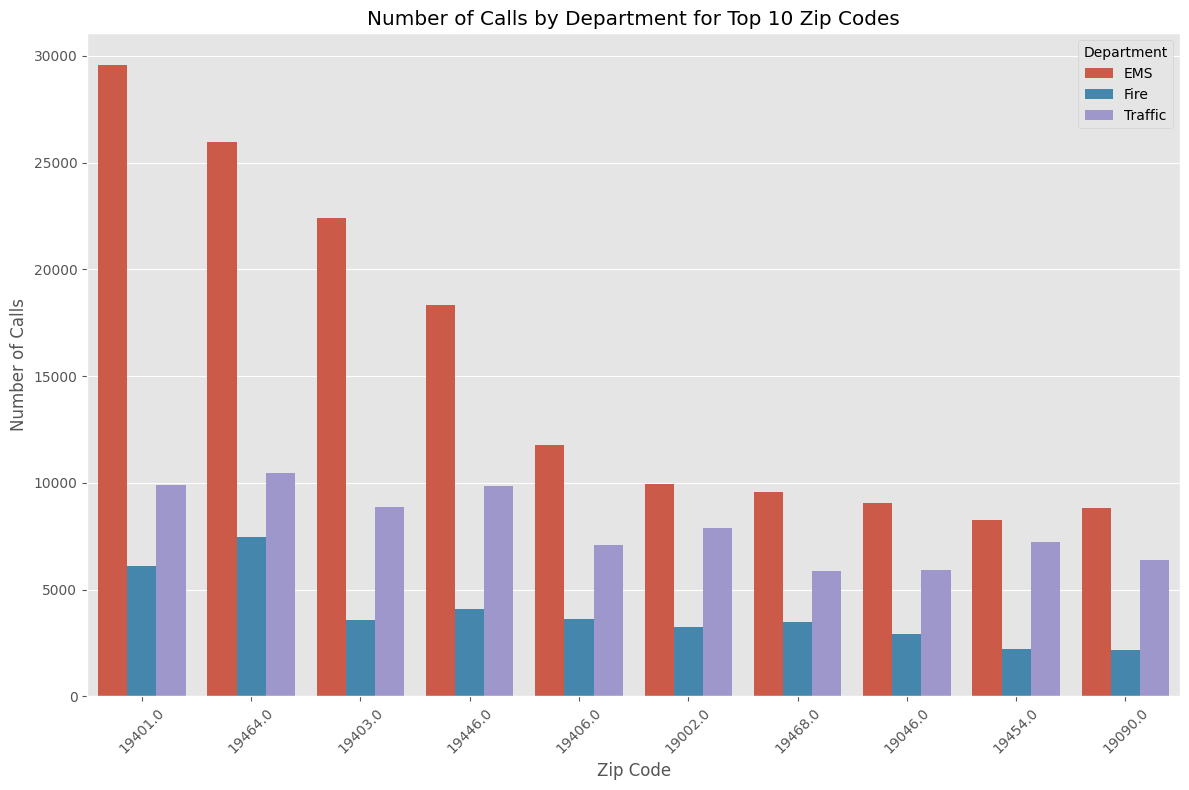

In [283]:
plt.figure(figsize=(12, 8))
sns.countplot(data=new_df, x='zip', hue='dept', order=calls_by_zip.index)
plt.xlabel('Zip Code')
plt.ylabel('Number of Calls')
plt.title('Number of Calls by Department for Top 10 Zip Codes')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.tight_layout()
plt.show()

We can see from the chart that EMS calls are much more than any other department

### **Analyzing towns**

**Top 10 towns for 911 calls.**

In [284]:
calls_by_town = new_df['town'].value_counts().head(10)
calls_by_town

town
LOWER MERION        55470
ABINGTON            39927
NORRISTOWN          37616
UPPER MERION        35990
CHELTENHAM          30554
POTTSTOWN           27382
UPPER MORELAND      22927
LOWER PROVIDENCE    22466
PLYMOUTH            20107
UPPER DUBLIN        18858
Name: count, dtype: int64

We can see that Lower Merion has the highest number of calls

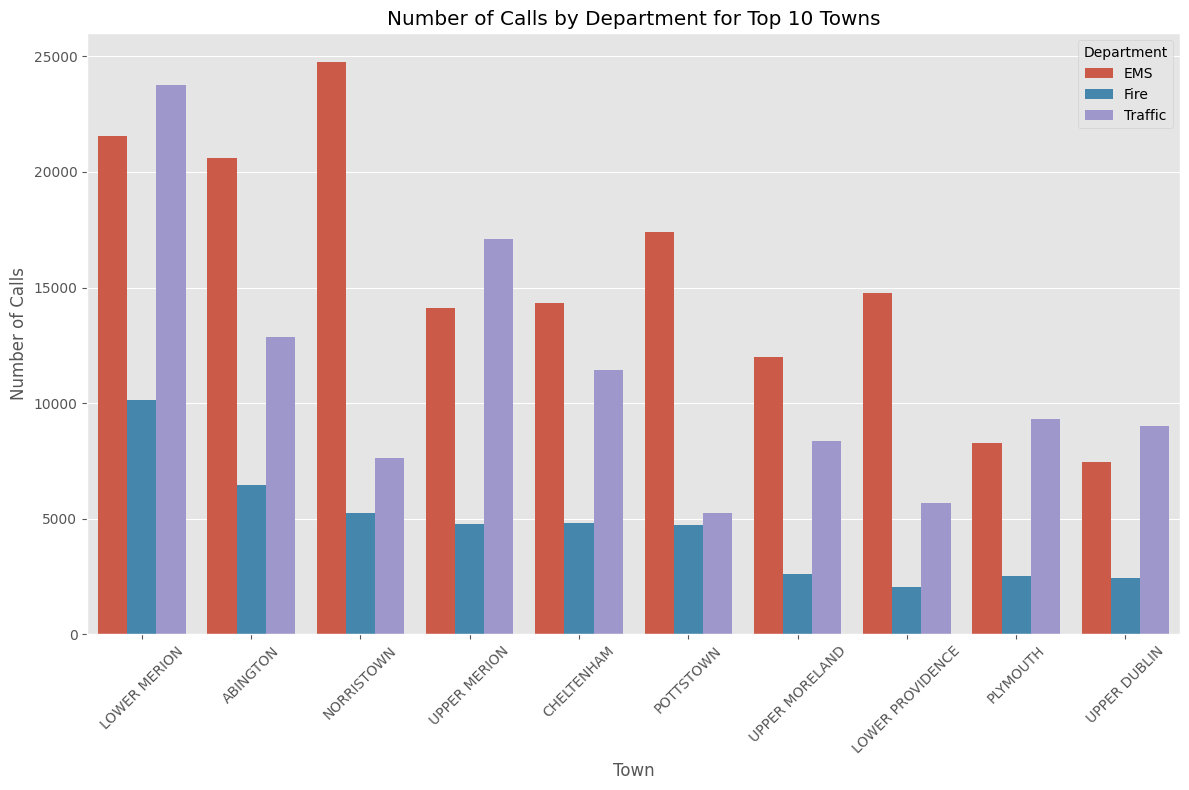

In [285]:
plt.figure(figsize=(12, 8))
sns.countplot(data=new_df, x='town', hue='dept', order=calls_by_town.index)
plt.xlabel('Town')
plt.ylabel('Number of Calls')
plt.title('Number of Calls by Department for Top 10 Towns')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.tight_layout()
plt.show()

This plot shows that even though most of the towns has more EMS calls. Lower Merion having the most number of calls faces a rush in Traffic calls.

### **Analyzing addresses**

Lets check which addresses have max calls in every town

In [286]:
address_calls = new_df.groupby(['town', 'address']).size().reset_index(name='calls')
max_calls_per_town = address_calls.loc[address_calls.groupby('town')['calls'].idxmax()]
max_calls_per_town.sort_values(by='calls', ascending=False,inplace=True)
max_calls_per_town

,town,address,calls
22225,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,7282
22815,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,2575
2366,ABINGTON,THE FAIRWAY & RYDAL RD,1983
20837,LOWER POTTSGROVE,EVERGREEN RD & W LIGHTCAP RD,1567
9537,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1556
...,...,...,...
15570,LOWER FREDERICK,BIG RD & THE ZIEGLERVILLE ROUNDABOUT,82
24582,NARBERTH,MONTGOMERY AVE & PRICE AVE,67
10722,GREEN LANE,GRAVEL PIKE & LUMBER ST,35
14456,LEHIGH COUNTY,NO LOCATION - NEIGHBORING COUNTY,25


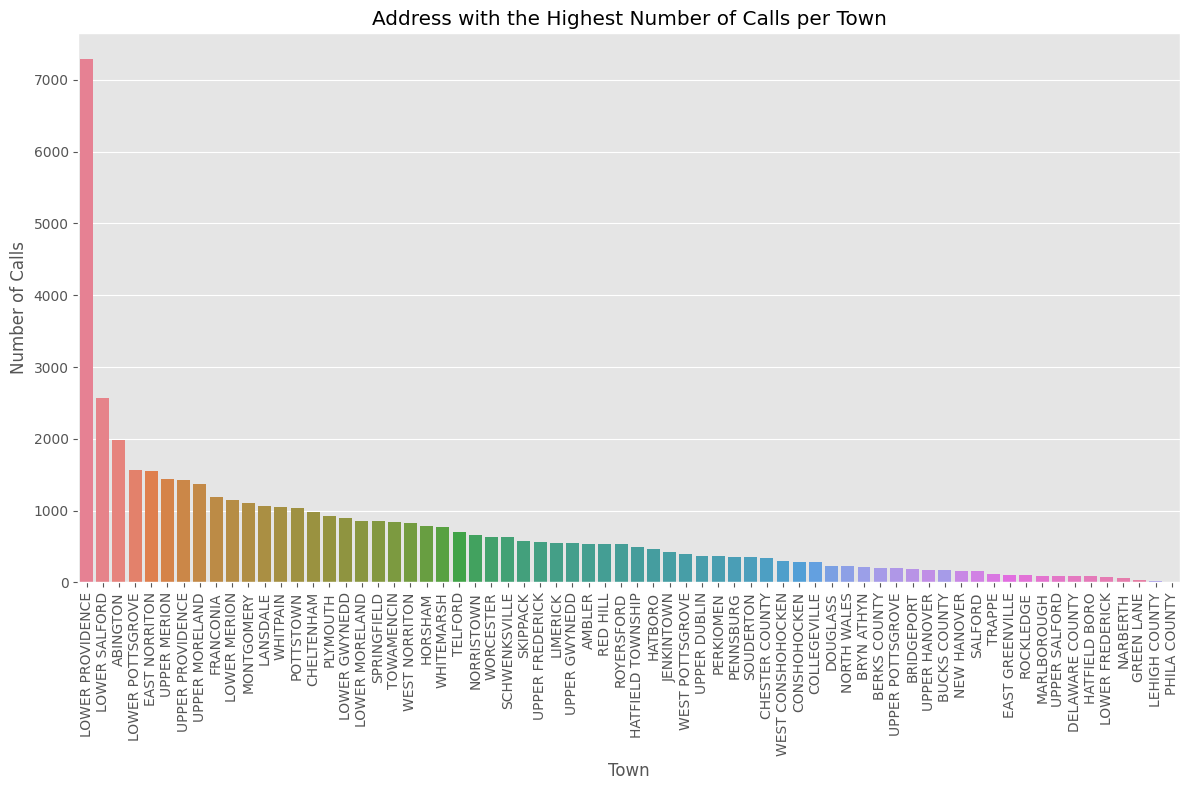

In [287]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=max_calls_per_town, x='town', y='calls', hue='address', dodge=False)
ax.legend_.remove()
plt.xlabel('Town')
plt.ylabel('Number of Calls')
plt.title('Address with the Highest Number of Calls per Town')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

This data shows us that even though the town with highest calls is Lower Merion, when it comes to its max calls from addresses Lower Providence is higher.<br>

Lets see the call distribution in Lower merion and Lower providence to understand how the number of calls are distributed

In [288]:
address_calls = new_df.groupby(['town', 'address']).size().reset_index(name='calls')

#Get the number of calls per address for both the towns
LM = address_calls[(address_calls['town'] == 'LOWER MERION') ]
LP = address_calls[(address_calls['town'] == 'LOWER PROVIDENCE')]
print(f'Lower Merion has {LM.shape[0]} addresses')
print(f'Lower Providence has {LP.shape[0]} addresses')

Lower Merion has 3371 addresses
Lower Providence has 1170 addresses


As both the towns has a lot of addresses, Lets take the top 10 address to plot the data.

In [289]:
LM.sort_values(by='calls', ascending=False, inplace=True)
LP.sort_values(by='calls', ascending=False, inplace=True)
LM = LM.head(10)
LP = LP.head(10)

C:\Users\nilan\AppData\Local\Temp\ipykernel_28920\875767360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LM.sort_values(by='calls', ascending=False, inplace=True)
C:\Users\nilan\AppData\Local\Temp\ipykernel_28920\875767360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LP.sort_values(by='calls', ascending=False, inplace=True)


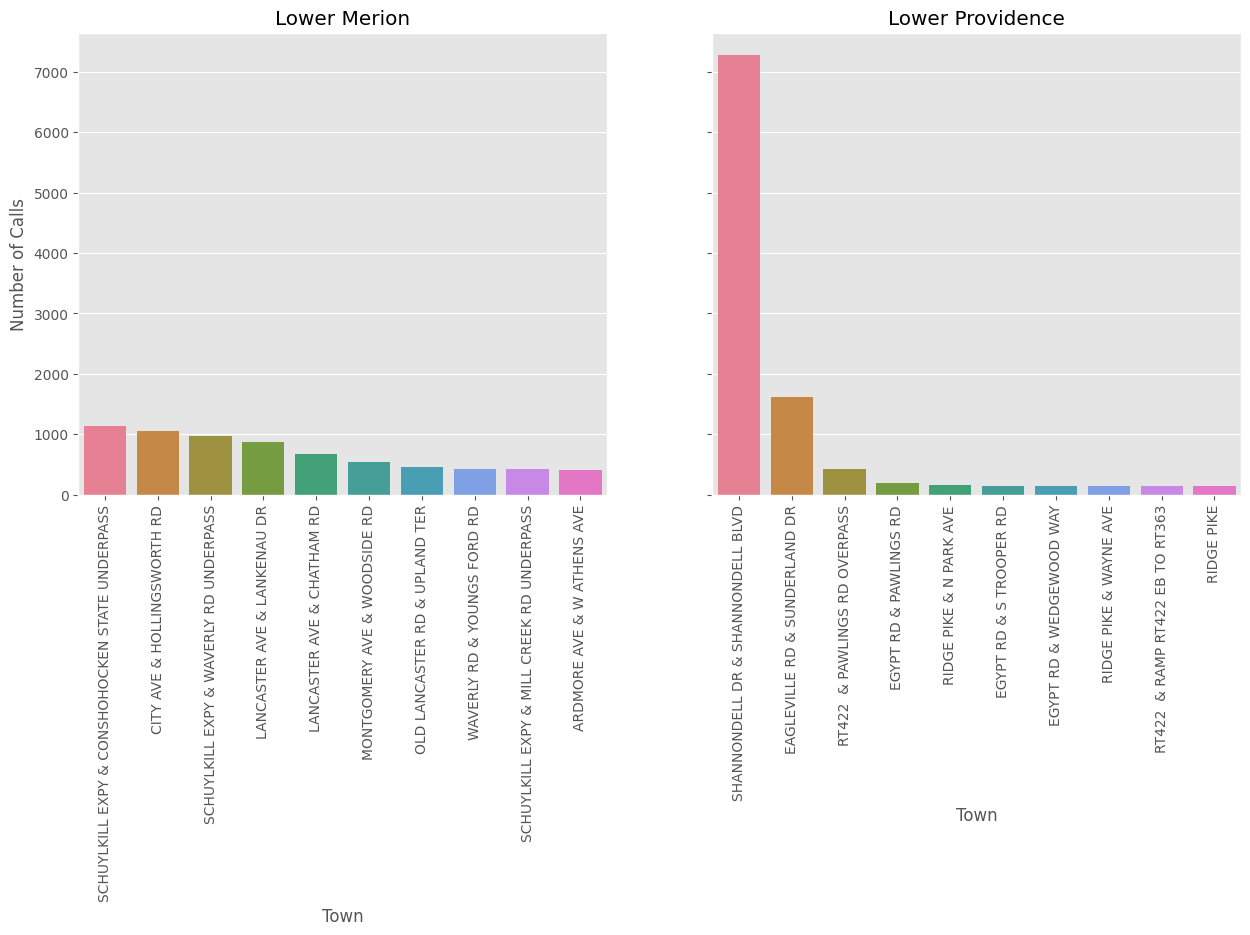

In [290]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for Lower merion
sns.barplot(ax=axes[0], data=LM, x='address', y='calls', hue='address', dodge=False)
axes[0].set_title('Lower Merion')
axes[0].set_xlabel('Town')
axes[0].set_ylabel('Number of Calls')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Lower Providence
sns.barplot(ax=axes[1], data=LP, x='address', y='calls', hue='address', dodge=False)
axes[1].set_title('Lower Providence')
axes[1].set_xlabel('Town')
axes[1].set_ylabel('Number of Calls')
axes[1].tick_params(axis='x', rotation=90)
plt.show()

From the plot we can clearly see that Lower Merion calls are quite consistent per address but in Lower Providence only the top 2 adddress have lot of calls compared to other addresses.

### **Analyzing department and reasons**

Lets check which department was called for the most.

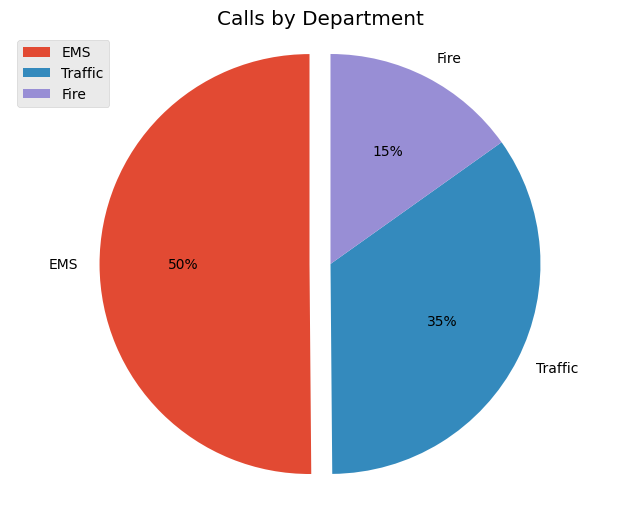

In [291]:
labels = ['EMS', 'Traffic', 'Fire']
plt.figure(figsize=(8, 6))
explode = (0.1,0,0)
plt.style.use('ggplot')
plt.pie(new_df['dept'].value_counts(), explode = explode,labels=labels, autopct='%.0f%%', startangle=90)
plt.title('Calls by Department')
plt.legend(loc = 'upper left')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We can clearly see that the most common department for 911 calls is EMS. 

Lets see what are the main reasons for calls

In [292]:
print(f'There are {new_df['reason'].nunique()} unique reasons for 911 calls')

There are 88 unique reasons for 911 calls


In [293]:
new_df['reason'].value_counts()

reason
VEHICLE ACCIDENT         184591
DISABLED VEHICLE          47895
FIRE ALARM                38428
FALL VICTIM               34662
RESPIRATORY EMERGENCY     34228
                          ...  
ARMED SUBJECT                 2
ANIMAL COMPLAINT              1
PRISONER IN CUSTODY           1
HIT + RUN                     1
FOOT PATROL                   1
Name: count, Length: 88, dtype: int64

The most common reason for call are vehicle accidents. 
Lets see in which towns are most prone to vehicle accidents.

In [294]:
vehicle_accidents = new_df[new_df['reason'] == 'VEHICLE ACCIDENT']
vehicle_accidents['town'].value_counts().head()

town
LOWER MERION    17975
UPPER MERION    13801
ABINGTON         9797
CHELTENHAM       9420
NORRISTOWN       7322
Name: count, dtype: int64

Here we can see Lower Merion has most vehicle accident calls

Lets dig deeper into the reasons

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


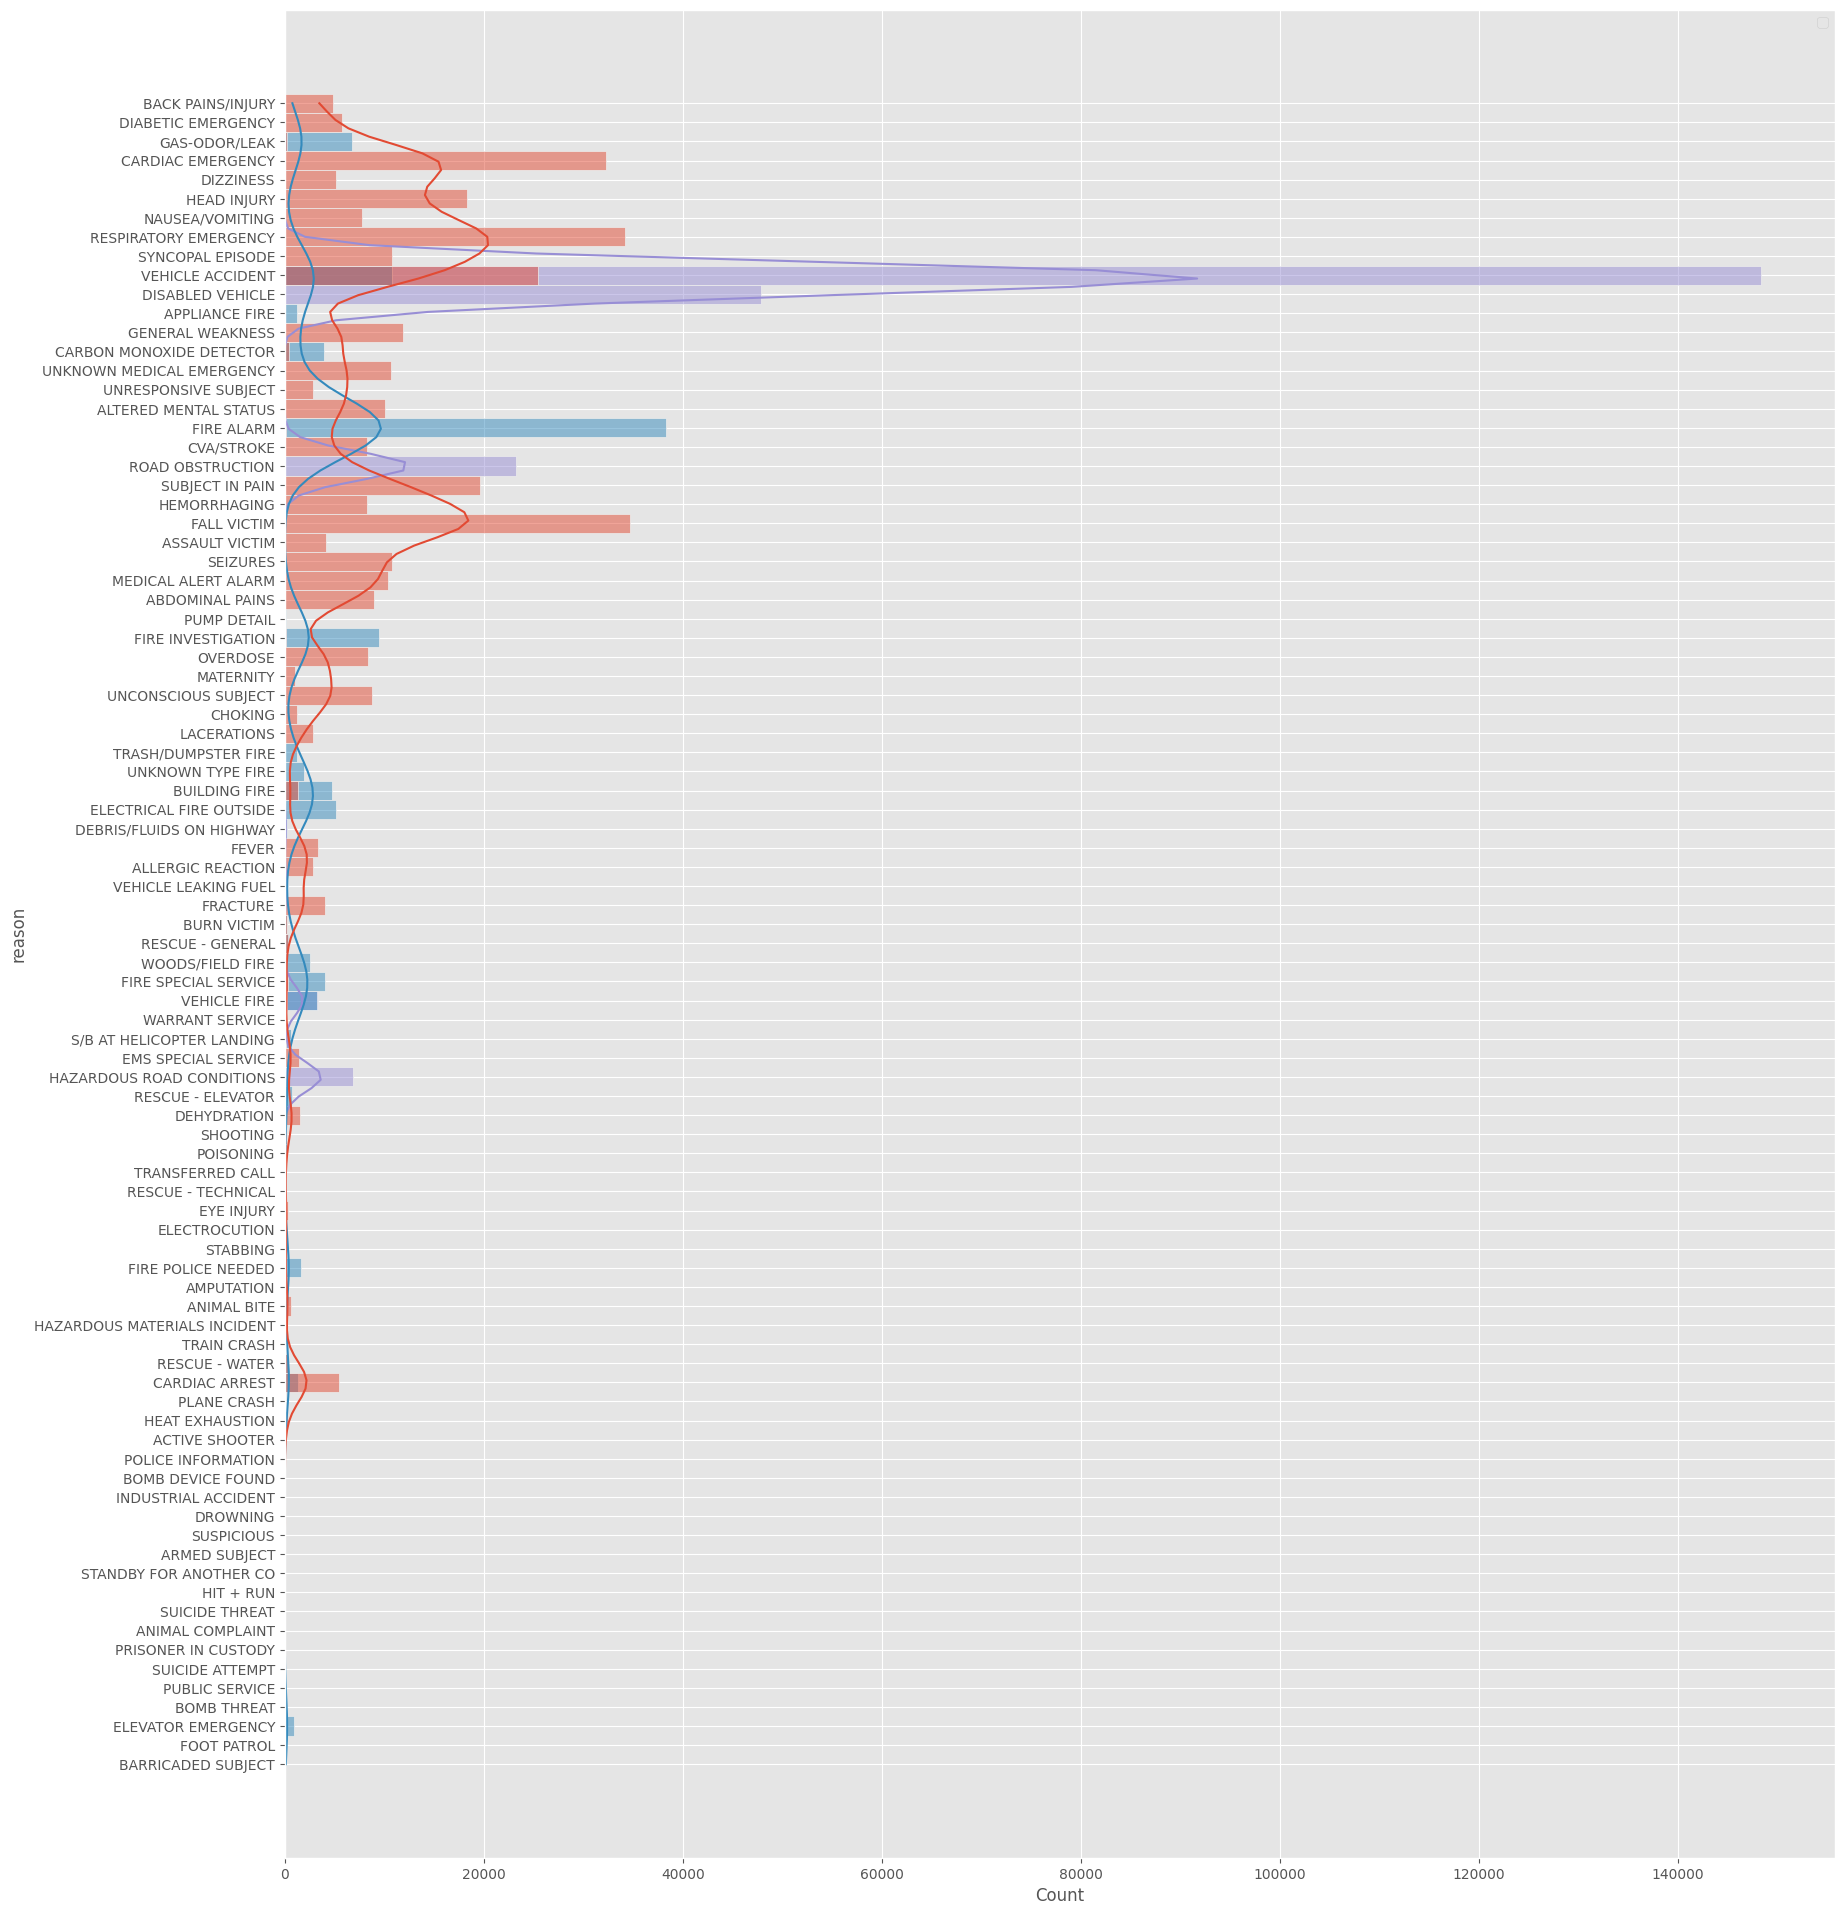

In [295]:
plt.figure(figsize=(20,24))
sns.histplot(new_df,y = 'reason', hue = 'dept',kde = True )
plt.legend()

Lets see what type of accidents are maximum in different departments.

In [296]:
#EMS reasons
ems_reasons = new_df[new_df['dept'] == 'EMS']
ems_reasons['reason'].value_counts()

reason
FALL VICTIM              34655
RESPIRATORY EMERGENCY    34226
CARDIAC EMERGENCY        32311
VEHICLE ACCIDENT         25456
SUBJECT IN PAIN          19637
                         ...  
BARRICADED SUBJECT           2
HIT + RUN                    1
DISABLED VEHICLE             1
VEHICLE LEAKING FUEL         1
POLICE INFORMATION           1
Name: count, Length: 81, dtype: int64

In [297]:
#Traffic reasons
traffic_reasons = new_df[new_df['dept'] == 'Traffic']
traffic_reasons['reason'].value_counts()

reason
VEHICLE ACCIDENT             148314
DISABLED VEHICLE              47887
ROAD OBSTRUCTION              23225
HAZARDOUS ROAD CONDITIONS      6828
VEHICLE FIRE                   3364
VEHICLE LEAKING FUEL            292
DEBRIS/FLUIDS ON HIGHWAY        201
Name: count, dtype: int64

In [298]:
#Fire reasons
fire_reasons = new_df[new_df['dept'] == 'Fire']
fire_reasons['reason'].value_counts()

reason
FIRE ALARM                      38312
VEHICLE ACCIDENT                10821
FIRE INVESTIGATION               9436
GAS-ODOR/LEAK                    6735
ELECTRICAL FIRE OUTSIDE          5108
BUILDING FIRE                    4751
FIRE SPECIAL SERVICE             4046
CARBON MONOXIDE DETECTOR         3989
VEHICLE FIRE                     3225
WOODS/FIELD FIRE                 2484
UNKNOWN TYPE FIRE                1963
FIRE POLICE NEEDED               1582
CARDIAC ARREST                   1364
APPLIANCE FIRE                   1214
TRASH/DUMPSTER FIRE              1186
ELEVATOR EMERGENCY                920
RESCUE - ELEVATOR                 736
S/B AT HELICOPTER LANDING         658
RESCUE - GENERAL                  375
VEHICLE LEAKING FUEL              336
RESCUE - WATER                    289
DEBRIS/FLUIDS ON HIGHWAY          256
BURN VICTIM                       226
PUMP DETAIL                       171
TRANSFERRED CALL                  101
HAZARDOUS MATERIALS INCIDENT       51
RESCU

In [299]:
vehicle_accident_percent = new_df['reason'].value_counts().get('VEHICLE ACCIDENT') / new_df['reason'].count()
vehicle_accident_percent = round(vehicle_accident_percent * 100,2)
vehicle_accident_percent

27.84

**Observations on the reason of calls**

The reasons are mixed up among the 3 categories. 

- For EMS department(covers 50% of the dataset) top 3 reasons:
    - FALL VICTIM
    - RESPIRATORY EMERGENCY
    - CARDIAC EMERGENCY 

- For Traffic department(covers 35% of the dataset) top 3 reasons:
    - VEHICLE ACCIDENT
    - DISABLED VEHICLE
    - ROAD OBSTRUCTION

- For Fire department(covers 15% of the dataset) top 3 reasons:
    - FIRE ALARM
    - VEHICLE ACCIDENT
    - FIRE INVESTIGATION

We can clearly see that VEHICLE ACCIDENT appears in all 3 departments covering all 28% of the dataset.

### **Analyzing timeStamp(year, month, day, week,time, hour)**

Firstly lets plot data to for yearwise calls

In [300]:
new_df['year'].value_counts()

year
2018    151451
2019    148895
2016    142291
2017    140264
2020     72188
2015      7900
Name: count, dtype: int64

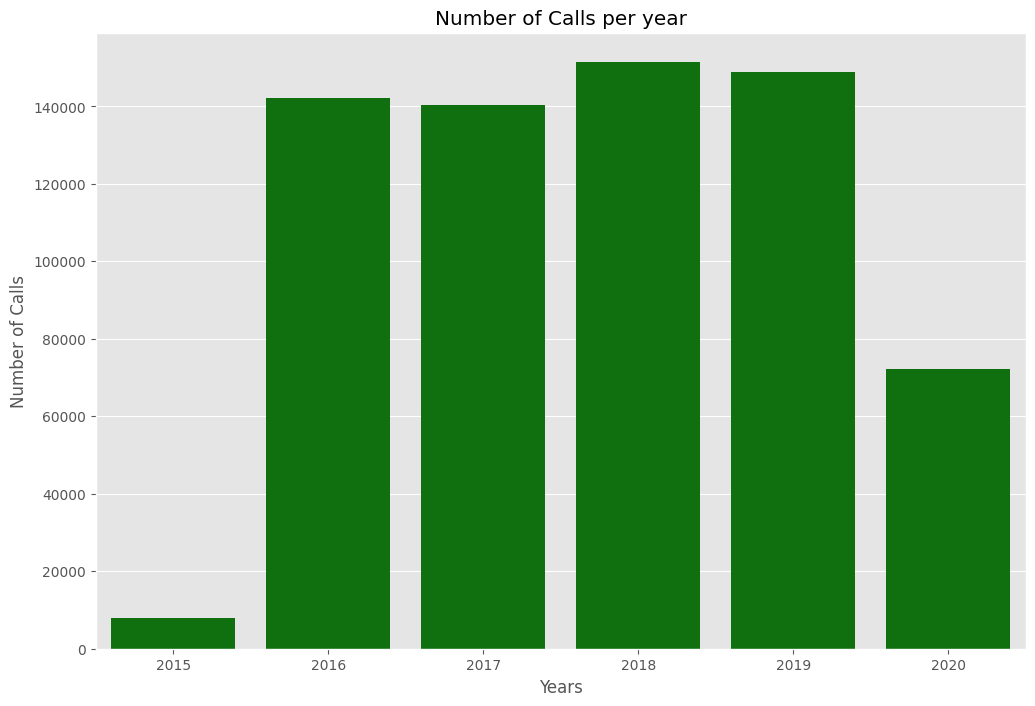

In [301]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=new_df, x='year', color='green')
plt.xlabel('Years')
plt.ylabel('Number of Calls')
plt.title('Number of Calls per year')
plt.show()

Surprisingly, we can see that 2015 and 2020 has very less calls compared to other years. Lets investigate the case.

As we know that the year column does not have any null values.

In [302]:
new_df['year'].isna().sum()

0

Lets check if we have all the months

In [303]:
year_group = new_df[(new_df['year'] == 2015) | (new_df['year'] == 2020)]
year_group = year_group[['year','month']]
year_group['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7])

As we can clearly see that 2015 only has records for december,<br>
and 2020 has records only upto July, which is why the calls are so low.

**Department wise distribution of years**

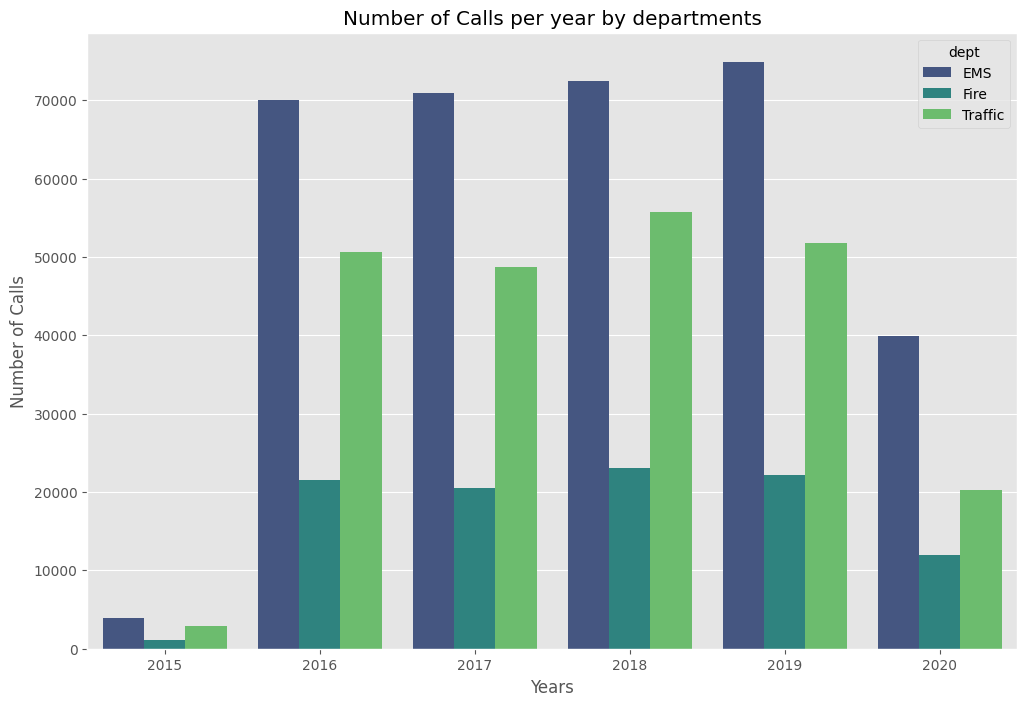

In [304]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=new_df, x='year', hue = 'dept', palette = 'viridis')
plt.xlabel('Years')
plt.ylabel('Number of Calls')
plt.title('Number of Calls per year by departments')
plt.show()

**Key notes**

- Dataset from 12-2015, so we have not much data points for 2015
- Dataset up to 07-2020, similarly we have about 7-month period data points for 2020
- The number of calls are much identical over years, a bit higher in 2018

**Month wise data for each department per year**

In [305]:
year_count = new_df['year'].unique()
print(f'Total data of {len(year_count)} years')

Total data of 6 years


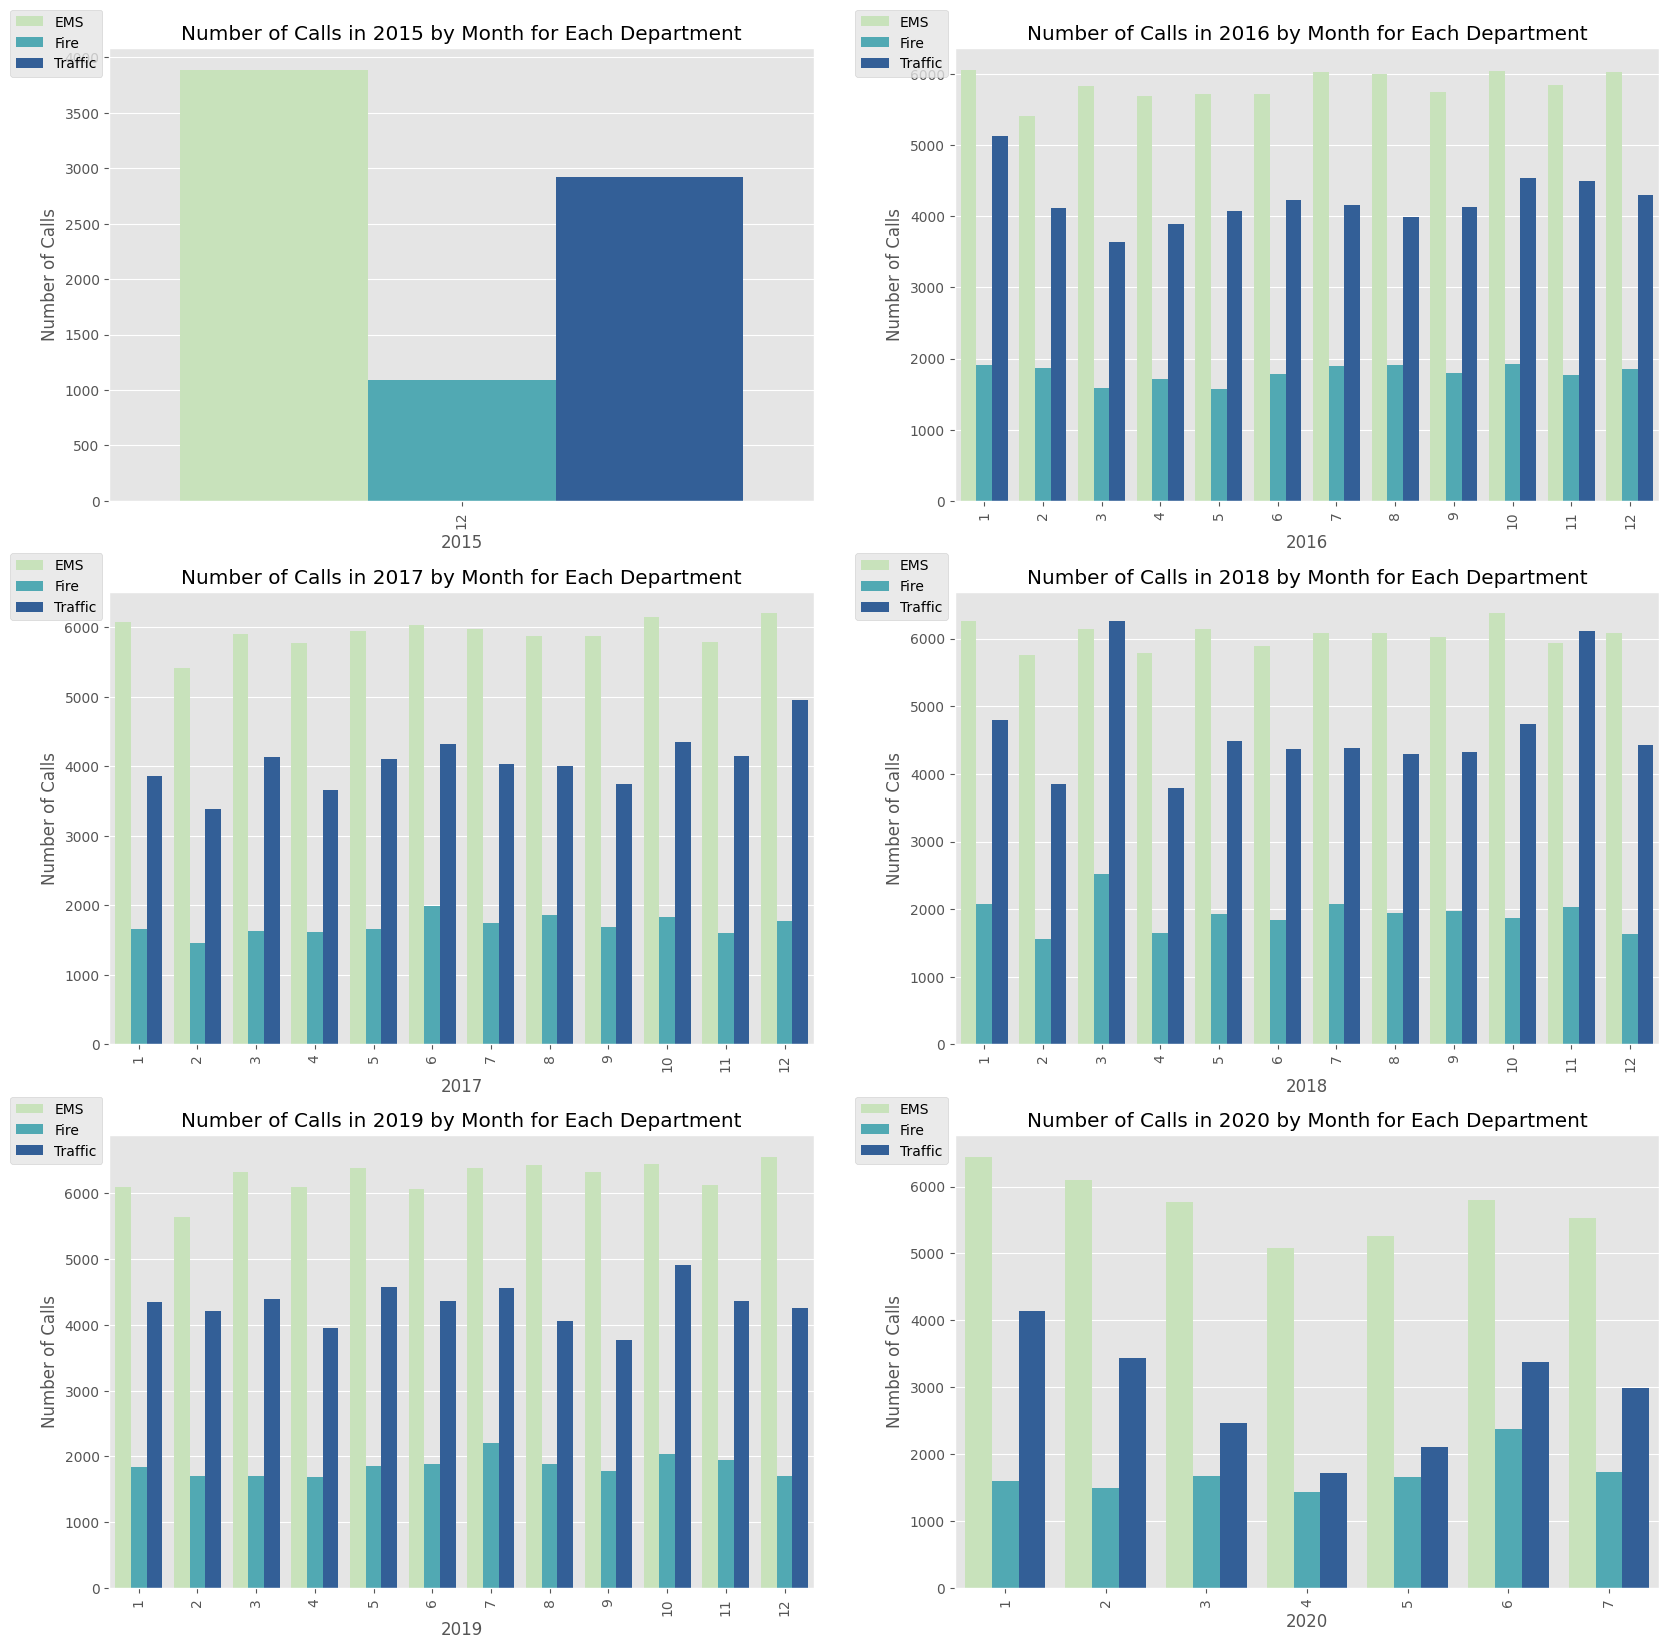

In [306]:
fig, axes = plt.subplots(3,2, figsize=(20, 20))

for idx, year in enumerate(year_count):
    row = idx // 2
    col = idx % 2
    sns.countplot(ax=axes[row, col], data=new_df[new_df['year'] == year], x='month', hue='dept', palette='YlGnBu')
    axes[row, col].legend(bbox_to_anchor=(0.0, 1.10), loc=1)
    axes[row, col].set_xlabel(year)
    axes[row, col].set_ylabel('Number of Calls')
    axes[row, col].set_title(f'Number of Calls in {year} by Month for Each Department')
    axes[row, col].tick_params(axis = 'x',rotation = 90)

plt.show()

**Key Notes**

- EMS calls have been the highest for all the years throughout each month.

- Traffic accidents has been the highest in the year 2018 for March and November

- Fire accidents have been consistently low throughout.

**Weekly analysis of calls per department**

In [307]:
weekly = new_df['weekday'].value_counts()
weekly

weekday
Fri    102855
Wed     99080
Thu     98606
Tue     97604
Mon     96684
Sat     89366
Sun     78794
Name: count, dtype: int64

Fridays have the most number of calls.

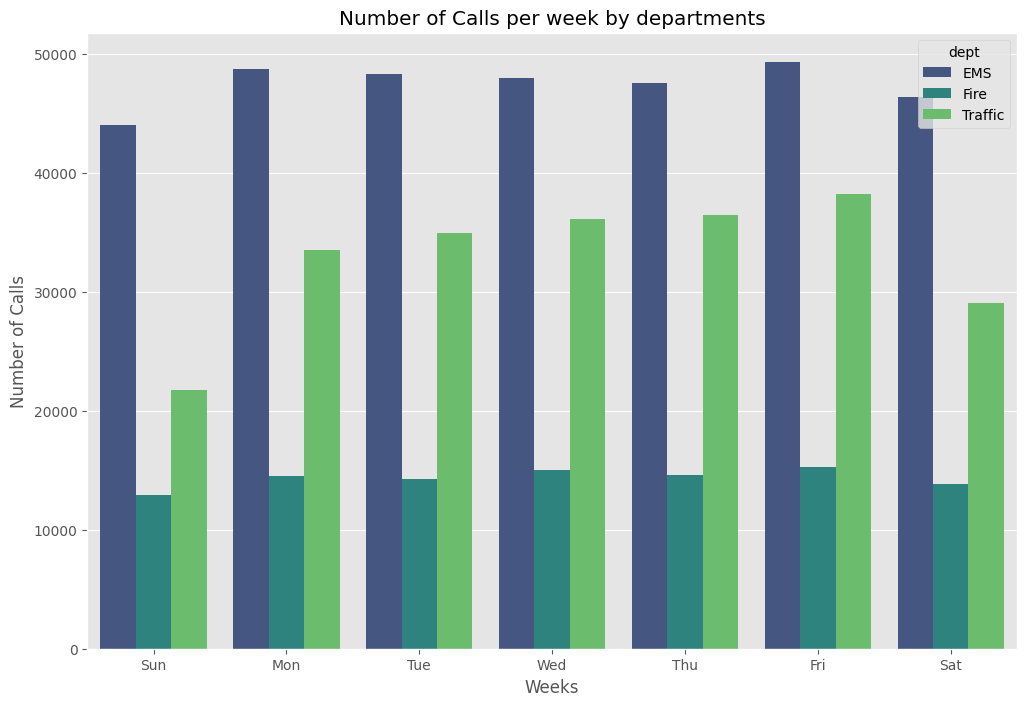

In [314]:
weekday_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=new_df, x='weekday', hue = 'dept', order=weekday_order, palette = 'viridis')
plt.xlabel('Weeks')
plt.ylabel('Number of Calls')
plt.title('Number of Calls per week by departments')
plt.show()

**Daily analysis of calls per department**

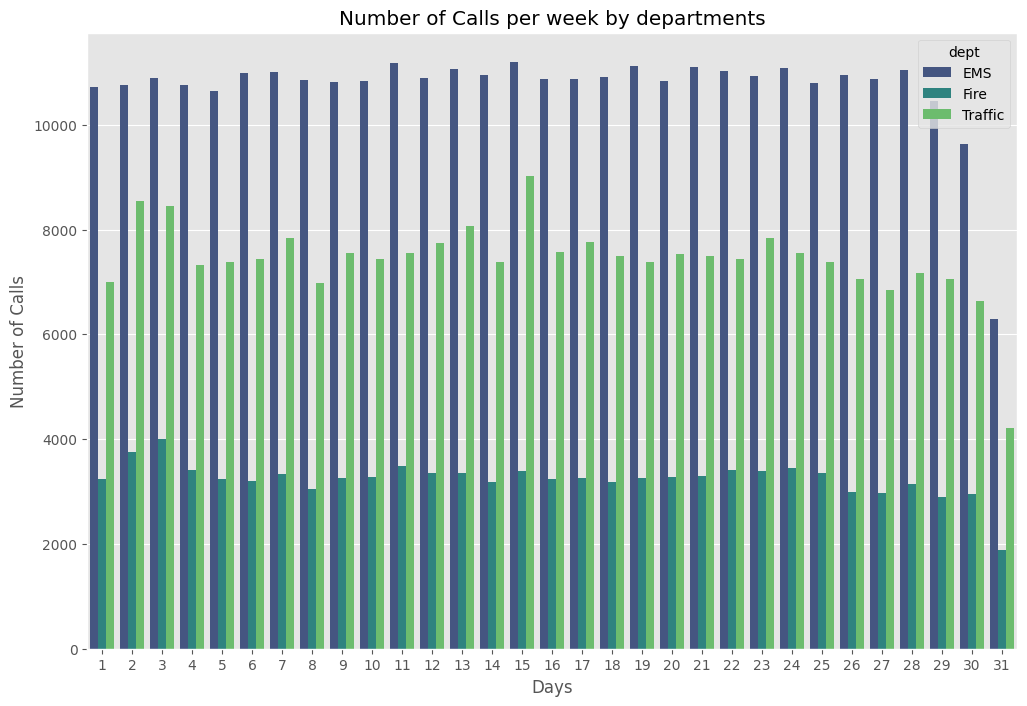

In [309]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=new_df, x='day', hue = 'dept', palette = 'viridis')
plt.xlabel('Days')
plt.ylabel('Number of Calls')
plt.title('Number of Calls per week by departments')
plt.show()

**Hourly analysis of calls per department**

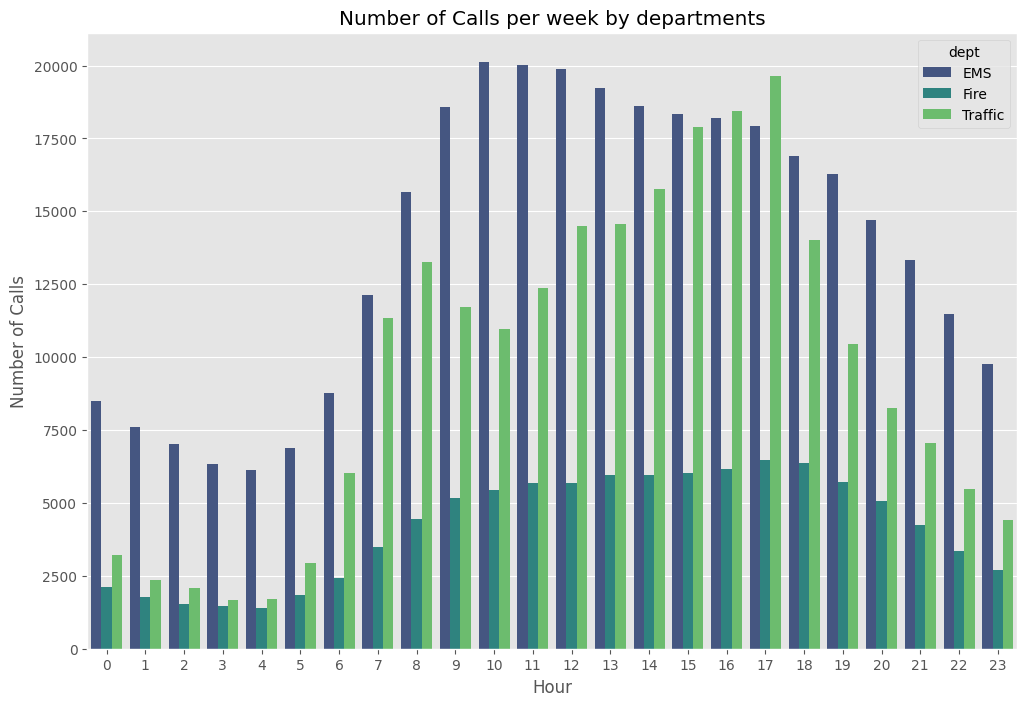

In [310]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=new_df, x='hour', hue = 'dept', palette = 'viridis')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.title('Number of Calls per week by departments')
plt.show()

Weeks and days have been quite consistent on calls but if we see the calls on hourly basis we can see a trend:<br>
- In 2019 most 911 calls occured during evening and the least occured around 4am.
- People should be carefull during evening times.
- As the day passed, 911 calls frequency increased then slowly went down.

**Lets see some trends**

**WEEK VS HOUR**

In [333]:
dayHour = new_df.groupby(by=['weekday','hour']).count()['dept'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Fri,1980,1631,1449,1295,1338,1637,2663,4138,5015,5288,...,6392,7038,7063,7107,5662,5054,4371,3912,3421,2828
Mon,1893,1567,1366,1271,1336,1843,2675,4428,5498,5722,...,5710,6287,6337,6407,5438,4487,3823,3251,2653,2068
Sat,2442,2058,1879,1588,1449,1579,1879,2487,3455,4310,...,5418,5181,5208,5207,4973,4747,4120,3890,3223,2961
Sun,2422,2131,1938,1613,1468,1487,1725,2404,2999,3728,...,4741,4473,4558,4500,4401,4132,3746,3157,2626,2321
Thu,1731,1405,1424,1233,1292,1774,2813,4431,5293,5409,...,6075,6490,6374,6930,5508,4701,4038,3487,2839,2351


<Axes: xlabel='hour', ylabel='weekday'>

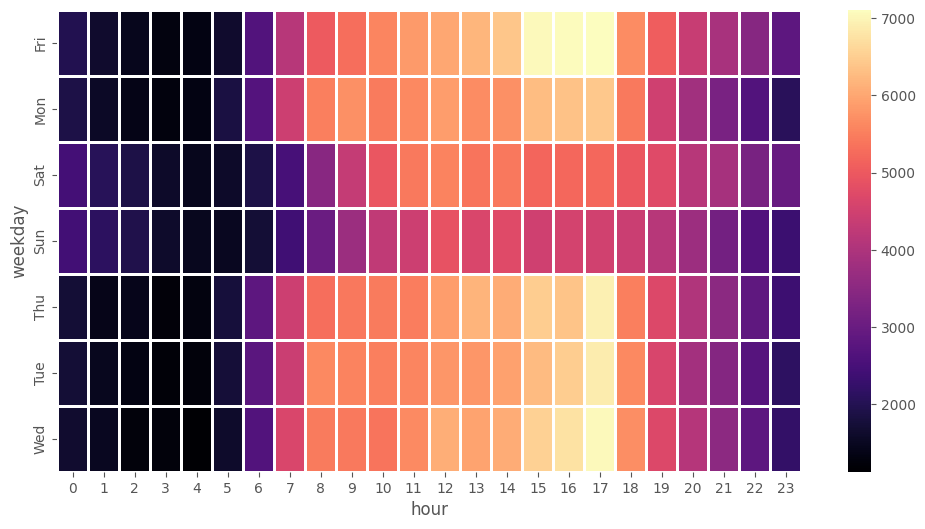

In [339]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='magma',linecolor='white',linewidths=1)

We can see here that 
- 5 pm has more number of calls every day
- Friday from 3 - 5 pm has a lot of calls
- Sundays has very low number of calls
- midnight to early mornings has the least number of calls

**MONTH VS WEEK**

In [350]:
weekMonth = new_df.groupby(by=['weekday','month']).count()['dept'].unstack()
weekMonth.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
weekday,,,,,,,,,,,,
Fri,9305,8251,10931,7966,8893,9198,8677,7332,7689,6931,8379,9303
Mon,8894,8743,8057,8398,7873,8508,9493,6852,6598,8067,6713,8488
Sat,8467,7588,8033,7493,7220,8193,7744,6108,6563,6607,6767,8583
Sun,7473,6450,6763,6846,6686,6832,7853,5272,5955,6315,5193,7156
Thu,9038,7995,8849,7700,8732,9486,8374,7500,6950,7482,8353,8147


<Axes: xlabel='month', ylabel='weekday'>

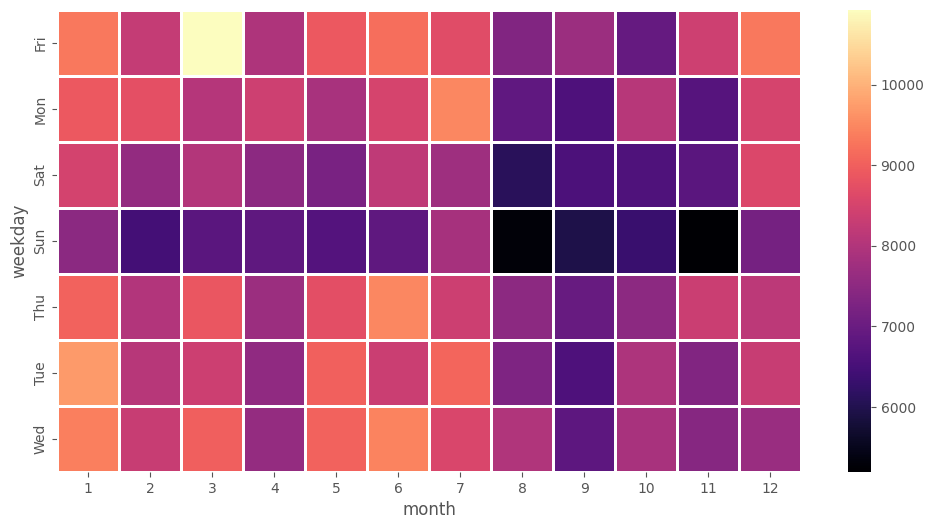

In [351]:
plt.figure(figsize=(12,6))
sns.heatmap(weekMonth,cmap='magma',linecolor='white',linewidths=1)

This shows that on month of march most calls were made.

# **OBSERVATIONS**

- **Lower Merion** has the highest number of calls with **55470** calls with **Abington** next with **39927** calls.

- **SHANNONDELL DR & SHANNONDELL BLVD** of **Lower providence** has the highest number of calls even though Lower Merion altogether has highest calls.

- People ask for **EMS** a lot more as compared to other services.

- **Vehicle accident** is the most common reason for 911 calls and it appears in calls for all 3 departments.

- **Midnight to early morning** has lowest number of calls with **Friday** being the busiest day


# **CONCLUSIONS**

1. What are the most common reasons for emergency calls, and how can public awareness and prevention programs be targeted effectively?<br>

    -->The most common reason for emergency calls is **vehicle  accidents**, with the **Emergency Medical Services (EMS)** department being the most frequently dispatched. To address this, public awareness and prevention programs should focus on road safety and accident prevention. Effective strategies include promoting safe driving practices, enforcing traffic laws, and increasing public awareness about the dangers of distracted and impaired driving. Additionally, community outreach programs can educate drivers on the importance of regular vehicle maintenance and the use of safety features such as seat belts and airbags. By targeting these areas, public awareness initiatives can significantly reduce the number of vehicle accidents and improve overall road safety.


2. How do characteristics of emergency calls vary across different townships and neighborhoods?

    -->The characteristics of emergency calls vary significantly across different townships and neighborhoods. In **Lower Merion**, calls are consistently high across various neighborhoods, indicating a widespread demand for emergency services. Conversely, in **Lower Providence**, the neighborhood of **Shannondell**, particularly along **Shannondell Boulevard**, experiences the highest number of emergency calls, while other areas within the township have relatively low call volumes. This disparity suggests that emergency response strategies in Lower Merion need to be **uniformly robust**, whereas in Lower Providence, targeted interventions in **Shannondell** could be more effective in addressing the concentrated demand for emergency services.